<a href="https://colab.research.google.com/github/MateoMVP/Lineal-Regression/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sklearn as skl
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

#Link de la fuente de la BD
#https://www.kaggle.com/datasets/abdurraziq01/cloud-computing-performance-metrics
#Ruta de la base de datos en colab
path = '/content/drive/MyDrive/vmCloud_data.csv'

In [ ]:
df = pd.read_csv(path)

In [ ]:
headers = ['cpu_usage','memory_usage','network_traffic','power_consumption','num_executed_instructions']

In [ ]:
df=df[headers]

In [ ]:
df.head()

,cpu_usage,memory_usage,network_traffic,power_consumption,num_executed_instructions
0,54.881350,78.950861,164.775973,287.808986,7527.0
1,71.518937,29.901883,NaN,362.273569,5348.0
2,NaN,92.709195,203.674847,231.467903,5483.0
3,54.488318,88.100960,NaN,195.639954,5876.0
4,42.365480,NaN,NaN,359.451537,3361.0


In [ ]:
#Buscar valores null o Nan

missing_values = df.isnull()
#missing_values.head()
for column in missing_values.columns.values.tolist():
  #print(column)
  print(missing_values[column].value_counts())
  print("")

cpu_usage
False    1800962
True      199038
Name: count, dtype: int64

memory_usage
False    1799490
True      200510
Name: count, dtype: int64

network_traffic
False    1800519
True      199481
Name: count, dtype: int64

power_consumption
False    1799729
True      200271
Name: count, dtype: int64

num_executed_instructions
False    1800314
True      199686
Name: count, dtype: int64



In [ ]:
#Eliminar fila de valores sin datos
df.dropna(subset=headers, axis=0, inplace=True)
# Resetear index
df.reset_index(drop=True, inplace=True)

In [ ]:
df.head()

,cpu_usage,memory_usage,network_traffic,power_consumption,num_executed_instructions
0,54.881350,78.950861,164.775973,287.808986,7527.0
1,64.589411,62.008016,580.569836,115.931610,4766.0
2,43.758721,22.456429,429.139640,272.960417,9008.0
3,96.366276,4.388441,902.827717,367.979056,9984.0
4,38.344152,16.441881,779.791345,382.756696,2989.0


In [ ]:
#Metodo para normalizar la data usando metodo min-max
def min_max_norm(column):
  return ((column - column.min())/(column.max() - column.min()))

In [ ]:
normalizar = ['cpu_usage','memory_usage','network_traffic','num_executed_instructions']

for columna in normalizar:
  df[columna] = min_max_norm(df[columna])

In [ ]:
df.head()

,cpu_usage,memory_usage,network_traffic,power_consumption,num_executed_instructions
0,0.548814,0.789509,0.164776,287.808986,0.752775
1,0.645895,0.620081,0.580570,115.931610,0.476648
2,0.437587,0.224564,0.429140,272.960417,0.900890
3,0.963664,0.043884,0.902828,367.979056,0.998500
4,0.383441,0.164419,0.779791,382.756696,0.298930


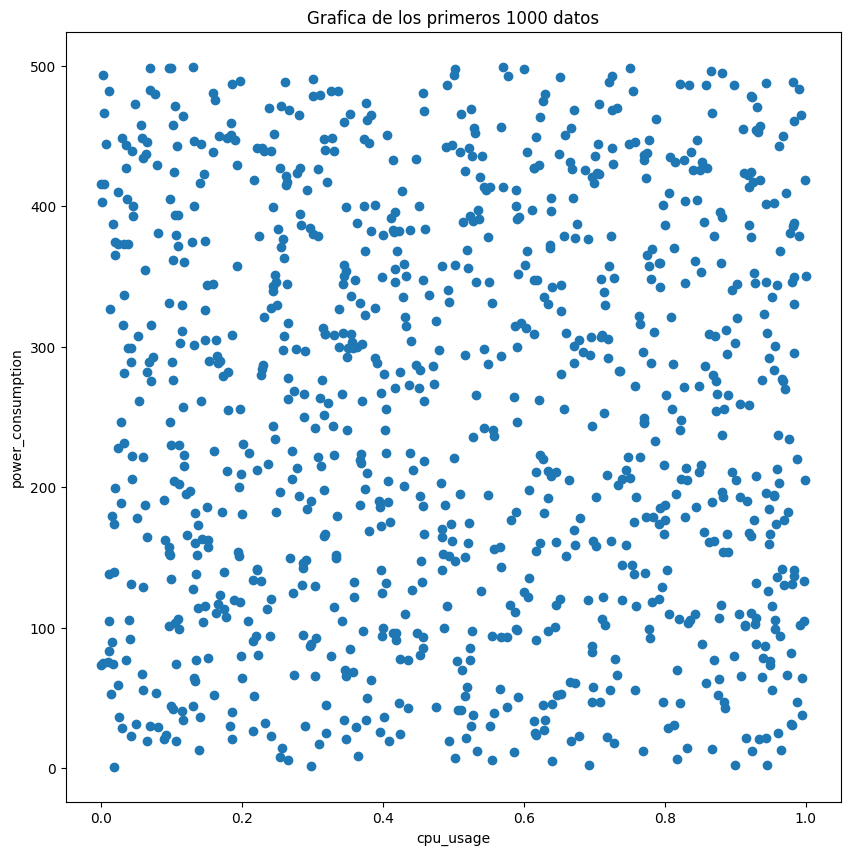

In [ ]:
df_100=df.head(1000)

plt.figure(figsize=(10,10))
plt.scatter(df_100['cpu_usage'], df_100['power_consumption'], marker='o')

# Añadir títulos y etiquetas
plt.title('Grafica de los primeros 1000 datos')
plt.xlabel('cpu_usage')
plt.ylabel('power_consumption')

# Mostrar la gráfica
plt.show()

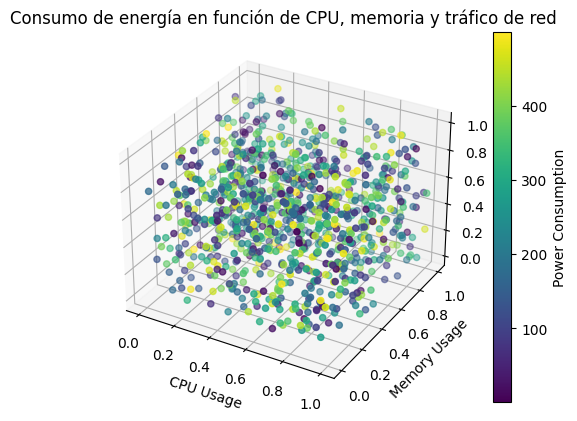

In [ ]:
# Crear una figura en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Definir los ejes X, Y, Z (cpu, memoria, tráfico y consumo de energía)
x = df_100['cpu_usage']
y = df_100['memory_usage']
z = df_100['network_traffic']
c = df_100['power_consumption']
# Crear la gráfica de dispersión
scatter = ax.scatter(x, y, z, c=c, cmap='viridis')
# Añadir etiquetas a los ejes
ax.set_xlabel('CPU Usage')
ax.set_ylabel('Memory Usage')
ax.set_zlabel('Network Traffic')
# Añadir una barra de colores para visualizar el consumo de energía
fig.colorbar(scatter, ax=ax, label='Power Consumption')
# Título del gráfico
ax.set_title('Consumo de energía en función de CPU, memoria y tráfico de red')
# Mostrar la gráfica
plt.show()


In [ ]:
#Definir Salida y caracteristicas
X = df[['cpu_usage','memory_usage','network_traffic','num_executed_instructions']]
y = df['power_consumption']

In [ ]:
X.head()

,cpu_usage,memory_usage,network_traffic,num_executed_instructions
0,0.548814,0.789509,0.164776,0.752775
1,0.645895,0.620081,0.580570,0.476648
2,0.437587,0.224564,0.429140,0.900890
3,0.963664,0.043884,0.902828,0.998500
4,0.383441,0.164419,0.779791,0.298930


In [ ]:
#Metodo para encontrar el modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

In [ ]:
X_train_poly.shape

(944979, 15)

In [ ]:
X_test_poly.shape

(236245, 15)

In [ ]:
y_train.shape

(944979,)

In [ ]:
y_test.shape

(236245,)

In [ ]:
#Funcion Error cuadratico medio
def mse(y_predic, y_real):
    error = y_predic - y_real
    mse = np.mean((error)**2)
    return mse

In [ ]:
#Gradiente descendente
def gradienteDescendente(caracteristicas, y, learning_rate, Iteraciones):
  m,n = caracteristicas.shape
  thetas = np.zeros(n)
  mse_values = []

  for i in range(Iteraciones):
    y_predic = np.dot(caracteristicas, thetas)
    error = y_predic - y
    d_thetas = (1/m) * np.dot(caracteristicas.T, error)
    thetas = thetas - learning_rate * d_thetas
    mseModel = mse(y_predic,y)
    mse_values.append(mseModel)

    if mseModel <= 0.0000000001:
      break

  print(mse_values[-1])
  return thetas, mse_values


In [ ]:
Iteraciones = 1000
learning_rate = 0.1
#Thetas y error para datos de train
print("Ultimo dato del error en el train")
thetas_model,mse_values = gradienteDescendente(X_train_poly, y_train, learning_rate, Iteraciones)
print("Ultimo dato del error en el test")
#Thetas y error para datos de test
thetas_model_test,mse_values_test = gradienteDescendente(X_test_poly, y_test, learning_rate, Iteraciones)

Ultimo dato del error en el train
20838.15349984966
Ultimo dato del error en el test
20885.984805725442


In [ ]:
thetas_model

array([221.39519794,  29.26709986,  30.25532531,  29.89351532,
        29.35842428,  -6.1841196 , -15.18215184, -15.42332476,
       -15.08654849,  -6.19126942, -16.31997559, -14.68714193,
        -5.04858048, -16.64185522,  -5.06330399])

In [ ]:
# Prediccion del consumo con los datos de entrenamiento
powerConsumption = np.dot(X_train_poly,thetas_model)
powerConsumption

array([252.42437641, 247.0279256 , 252.13035503, ..., 252.17791352,
       251.89194139, 251.23736414])

In [ ]:
# Prediccion del consumo con los datos de test
powerConsumption_test = np.dot(X_test_poly,thetas_model_test)
powerConsumption_test

array([252.52772424, 253.3170066 , 252.47994795, ..., 240.89540167,
       250.14794657, 243.26909801])

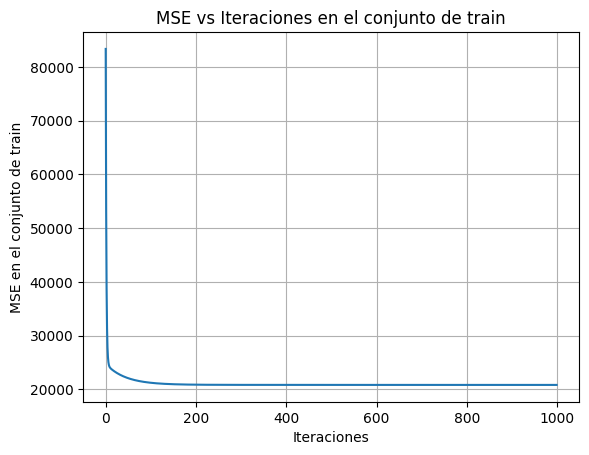

In [ ]:
#Grafica de error vs iteraciones para datos de train
plt.plot(mse_values)
plt.xlabel('Iteraciones')
plt.ylabel('MSE en el conjunto de train')
plt.title('MSE vs Iteraciones en el conjunto de train')
plt.grid(True)
plt.show()

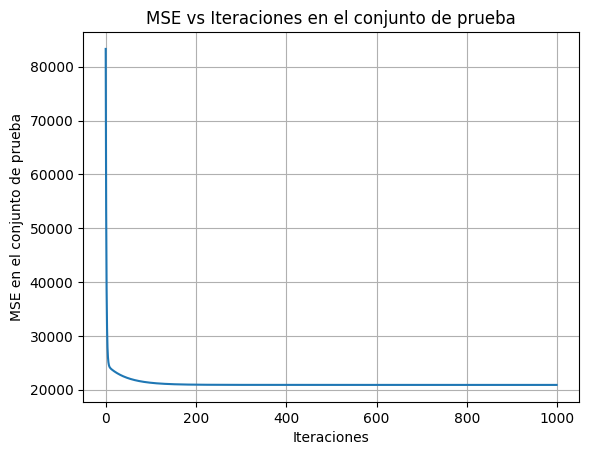

In [ ]:
#Grafica de error vs iteraciones para datos de test
plt.plot(mse_values_test)
plt.xlabel('Iteraciones')
plt.ylabel('MSE en el conjunto de prueba')
plt.title('MSE vs Iteraciones en el conjunto de prueba')
plt.grid(True)
plt.show()